# Project 5 : Wrangle and Analyze 

# 1- Gathering

In [1]:
# Importing libraries that we need :
import pandas as pd
import numpy as np 
import requests
import json
import os
import re
import matplotlib.pyplot as plt
import datetime
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%matplotlib inline


In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(os.getcwd(), url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:
img_pred = pd.read_csv('image-predictions.tsv', sep='\t')
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_jsonn.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256


KeyboardInterrupt: 

In [7]:
tweet_id = []
favorite = []
retweet = []
with open('tweet_json.txt', mode = 'r') as f:
     for line in f.readlines():
            data = json.loads(line)
            tweet_id.append(data['id'])
            favorite.append(data['favorite_count'])
            retweet.append(data['retweet_count'])
            
additional_data = pd.DataFrame({'tweet_id':tweet_id, 'favorite_count':favorite, 'retweet_count':retweet})
additional_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


# 2- Assessment

In [8]:
df.shape

(2356, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df.sample(12)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2208,668625577880875008,NaN,NaN,2015-11-23 03:02:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maks. Maks just noticed something wasn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668625577...,10,10,Maks,None,None,None,None
848,766069199026450432,NaN,NaN,2016-08-18 00:28:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Juno. She can see your future. 12/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766069199...,12,10,Juno,None,None,None,None
1252,710844581445812225,NaN,NaN,2016-03-18 15:05:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Staniel. His selfie game is strong af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710844581...,10,10,Staniel,None,None,None,None
77,877736472329191424,NaN,NaN,2017-06-22 03:54:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aja. She was just told she's a good do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877736472...,13,10,Aja,None,None,None,None
2235,668171859951755264,NaN,NaN,2015-11-21 20:59:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Trans Siberian Kellogg named Alfonso...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668171859...,7,10,a,None,None,None,None
917,756939218950160384,NaN,NaN,2016-07-23 19:49:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jax. He is a majestic mountain pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756939218...,12,10,Jax,None,None,pupper,None
1975,672997845381865473,NaN,NaN,2015-12-05 04:36:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kenzie. She is a fluff ball. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672997845...,12,10,Kenzie,None,None,None,None
1483,693262851218264065,NaN,NaN,2016-01-30 02:41:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I hope you guys enjoy this beautiful snowy pup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693262851...,11,10,None,None,None,pupper,None
329,833479644947025920,NaN,NaN,2017-02-20 00:53:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Poppy. She just arrived. 13/10 would s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833479644...,13,10,Poppy,None,None,None,None
1096,736365877722001409,NaN,NaN,2016-05-28 01:18:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rory. He's extremely impatient. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736365877...,11,10,Rory,None,None,pupper,None


In [12]:
df[df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [13]:
df.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
           ... 
DayZ          1
Skittles      1
Stella        1
Pip           1
Halo          1
Name: name, Length: 957, dtype: int64

In [14]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
img_pred.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1564,793614319594401792,https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg,1,golden_retriever,0.705092,True,Labrador_retriever,0.219721,True,kuvasz,0.015965,True
715,685547936038666240,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1,web_site,0.923987,False,oscilloscope,0.009712,False,hand-held_computer,0.008769,False
1039,712085617388212225,https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg,2,Shih-Tzu,0.625129,True,Tibetan_terrier,0.126897,True,Lhasa,0.119663,True
1390,766693177336135680,https://pbs.twimg.com/media/CqPXYLLXEAAU2HC.jpg,1,Doberman,0.948355,True,vizsla,0.015032,True,Rhodesian_ridgeback,0.009631,True
640,681302363064414209,https://pbs.twimg.com/media/CXR44l9WcAAcG_N.jpg,1,frilled_lizard,0.326259,False,tailed_frog,0.104539,False,axolotl,0.072479,False
237,670433248821026816,https://pbs.twimg.com/media/CU3be0SWEAEqb7I.jpg,1,window_shade,0.583427,False,giant_schnauzer,0.062215,True,window_screen,0.039941,False
982,707387676719185920,https://pbs.twimg.com/media/CdElVm7XEAADP6o.jpg,1,Chihuahua,0.888468,True,Italian_greyhound,0.088635,True,toy_terrier,0.015938,True


In [16]:
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [18]:
additional_data.sample(7)

,tweet_id,favorite_count,retweet_count
747,779377524342161408,9831,3613
876,760656994973933572,7343,2210
929,754120377874386944,8655,2670
1897,674670581682434048,1751,729
1729,679844490799091713,2593,887
445,819015337530290176,0,42228
571,801285448605831168,6802,960


In [19]:
additional_data.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


# Quality

1- Remove tweets with Retweets From df 

2- Drop retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp From df

3- Drop retweet_count From additional_data

4- Ratings that have a decimal in them are incorrectly extracted should be corrected.

5- Fix type of timestamp to be datetime & Fix type of tweet_id to be str in df table 

6- Fix type of tweet_id to be str in additional_data table

7- Fix type of tweet_id to be str in img_pred table 

8- Replace Wrong Names in name column in df table to be None 

# Tidiness

1- Group dog names in one column

2- Merge the three separated tables in one


# 3 - Cleaning

In [20]:
# Making copies of our data frames
df_clean = df.copy()
img_pred_clean = img_pred.copy()
additional_data_clean = additional_data.copy()



# Quality Part :

* Remove tweets with Retweets From df

In [21]:
df_clean = df_clean[df_clean['retweeted_status_id'].isnull() != False]
# Testing
df_clean[df_clean['retweeted_status_id'].isnull() == False]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


* Drop retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp

In [22]:
df_clean = df_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])
# Testing
df_clean.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


* Drop retweet_count From additional_data

In [23]:
additional_data_clean = additional_data_clean.drop(columns=['retweet_count'])
# Testing
additional_data_clean.head()

,tweet_id,favorite_count
0,892420643555336193,39467
1,892177421306343426,33819
2,891815181378084864,25461
3,891689557279858688,42908
4,891327558926688256,41048


* Ratings that have a decimal in them are incorrectly extracted should be corrected.


In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


In [25]:
def find_dot(x):
    if '.' in str(x):
        return True
    else:
        return False

df_clean['new'] = df_clean.text.str.extract('(?P<new>(\d+).(\d+)+/\d+)', expand=False)['new']
df_clean.loc[df_clean['new'].apply(find_dot) == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None,13.5/10
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,9.75/10
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None,11.27/10
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,5,10,None,None,None,None,None,9.5/10
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None,11.26/10


In [26]:
new_df = pd.DataFrame(df_clean.loc[df_clean['new'].apply(find_dot) == True].new.str.split('/').tolist(), columns=['rating_numerator', 'rating_denominator'])

df_clean.loc[df_clean['new'].apply(find_dot) == True,'rating_numerator'] = new_df['rating_numerator'].tolist()
df_clean.loc[df_clean['new'].apply(find_dot) == True,'rating_denominator'] = new_df['rating_denominator'].tolist()
df_clean.loc[df_clean['new'].apply(find_dot) == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,None,None,None,None,13.5/10
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None,9.75/10
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None,11.27/10
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,9.5,10,None,None,None,None,None,9.5/10
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None,None,None,None,11.26/10


In [27]:
df_clean.drop(['new'], axis= 1, inplace= True)

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null object
rating_denominator       2175 non-null object
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 254.9+ KB


In [29]:
df_clean.rating_denominator = df_clean.rating_denominator.astype(float)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null object
rating_denominator       2175 non-null float64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(3), int64(1), object(10)
memory usage: 254.9+ KB


In [30]:
df_clean.rating_numerator = df_clean.rating_numerator.astype(float)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 254.9+ KB


* Fix type of timestamp to be datetime

In [31]:
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)
# Testing
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns, UTC]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(8)
memory usage: 254.9+ KB


* Fix type of tweet_id to be str in df table

In [32]:
df_clean.tweet_id = df_clean.tweet_id.astype('str')
# Testing
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns, UTC]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns, UTC](1), float64(4), object(9)
memory usage: 254.9+ KB


* Fix type of tweet_id to be str in additional_data table

In [33]:
additional_data_clean.tweet_id = additional_data_clean.tweet_id.astype('str')
# Testing
additional_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 2 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.9+ KB


* Fix type of tweet_id to be str in img_pred table 

In [34]:
img_pred_clean.tweet_id = img_pred_clean.tweet_id.astype('str')
# Testing
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


*  Replace wrong names in name column in df table to be None 

In [35]:
wrong_names = ['a', 'an', 'the', 'just', 'one', 'very', 'not', 'all', 'officially', '0', 
             'unacceptable', 'my', 'by', 'his', 'such']

for name in df_clean.name:
    if name in wrong_names:
        df_clean.name[df_clean.name == name] = 'None'
# Testing
df_clean.name.value_counts()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


None       769
Lucy        11
Charlie     11
Oliver      10
Cooper      10
          ... 
Callie       1
Lolo         1
Yoda         1
DayZ         1
Halo         1
Name: name, Length: 942, dtype: int64

# Tidiness Part :

* Group dog names in one column

In [36]:
tweet_ids = df_clean.tweet_id.tolist()

#Melting the doggo, pupper, puppo, and floofer int one column
df_clean =pd.melt(df_clean, id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
                               'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'], 
        var_name = 'clo_drop', value_name = 'type')
df_clean.head(2)
df_clean = df_clean.drop('clo_drop', axis =1)

for idx, twtid in enumerate(tweet_ids):
    dog_tweets = df_clean[df_clean.tweet_id == twtid]
    
    
    if dog_tweets.type.values.tolist()[0] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        df_clean.loc[idx, 'type'] = ','.join(doge_type)
        df_clean = df_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)
        continue
        
    if dog_tweets.type.values.tolist()[1] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        df_clean.loc[idx, 'type'] = ','.join(doge_type)
        df_clean = df_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)
        continue
        
    if dog_tweets.type.values.tolist()[2] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        df_clean.loc[idx, 'type'] = ','.join(doge_type)
        df_clean = df_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)
        continue
        
    if dog_tweets.type.values.tolist()[3] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        df_clean.loc[idx, 'type'] = ','.join(doge_type)
        df_clean = df_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)
        continue
    else: 
        df_clean = df_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)
#Testing        
print(df_clean.type.value_counts())
       

None             1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: type, dtype: int64


* Merge the three separated tables in one

In [37]:
df_clean = pd.merge(df_clean, additional_data_clean,
                        how = 'inner', on = 'tweet_id')
df_clean = pd.merge(df_clean, img_pred_clean,
                        how = 'inner', on = 'tweet_id')
# Testing
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns, UTC]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
type                     1994 non-null object
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog  

# Analysis Part :

In [38]:
df_clean.to_csv('twitter_archive_master.csv', index = False)

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns, UTC]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
type                     1994 non-null object
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog  

In [48]:
df_clean.shape

(1994, 23)

In [49]:
df_clean.describe()

,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2.300000e+01,2.300000e+01,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,6.978112e+17,4.196984e+09,12.237101,10.532096,8895.725677,1.203109,0.593941,1.344195e-01,6.024848e-02
std,4.359384e+16,0.000000e+00,41.471197,7.320710,12213.193181,0.560777,0.271954,1.006807e-01,5.089067e-02
min,6.671522e+17,4.196984e+09,0.000000,2.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.732411e+17,4.196984e+09,10.000000,10.000000,1982.000000,1.000000,0.362857,5.393988e-02,1.619283e-02
50%,6.757073e+17,4.196984e+09,11.000000,10.000000,4136.000000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,7.031489e+17,4.196984e+09,12.000000,10.000000,11308.000000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,8.558181e+17,4.196984e+09,1776.000000,170.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [50]:
print ('Rating Numerator Mean =' ) 
df_clean.rating_numerator.mean()

Rating Numerator Mean =


12.237101303911734

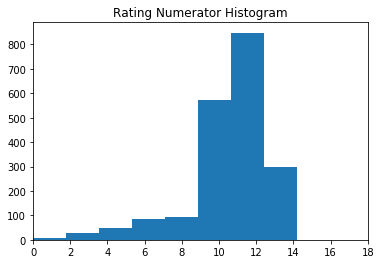

In [51]:
plt.hist(x = df_clean.rating_numerator, bins = 1000)
plt.xlim(0,18)
plt.title('Rating Numerator Histogram')
plt.show()

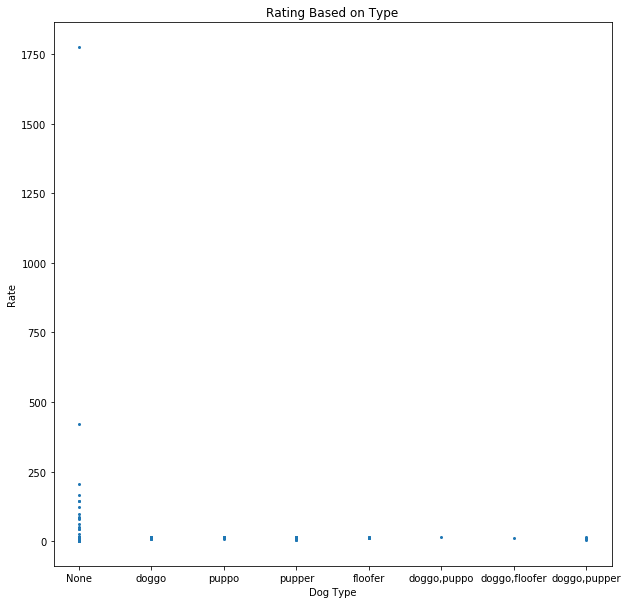

In [52]:
plt.figure(1, figsize = (10, 10))
plt.plot(df_clean.type ,df_clean.rating_numerator, marker = 'o', linestyle = '', ms = 2)
plt.title('Rating Based on Type')
plt.xlabel('Dog Type')
plt.ylabel('Rate')
plt.show()

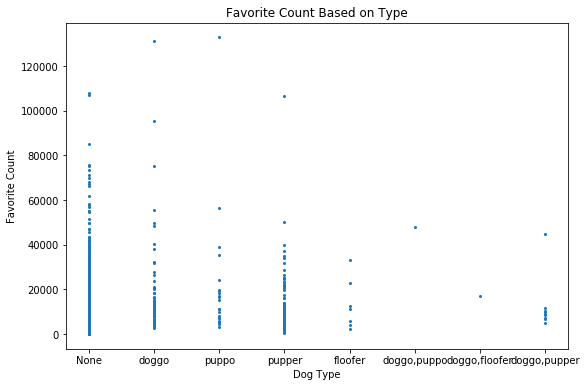

In [53]:
plt.figure(1, figsize = (9, 6))
plt.plot(df_clean.type ,df_clean.favorite_count, marker = 'o', linestyle = '', ms = 2)
plt.title('Favorite Count Based on Type')
plt.xlabel('Dog Type')
plt.ylabel('Favorite Count')
plt.show()

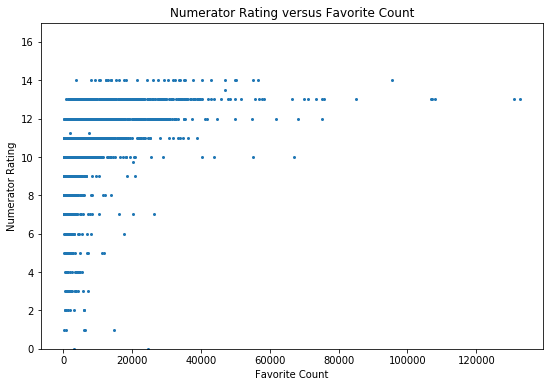

In [54]:
plt.figure(1, figsize = (9, 6))
plt.plot(df_clean.favorite_count, df_clean.rating_numerator, marker ='o', linestyle='', ms= 2)
plt.title('Numerator Rating versus Favorite Count')
plt.xlabel('Favorite Count')
plt.ylabel('Numerator Rating')
plt.ylim(0,17)
plt.show()

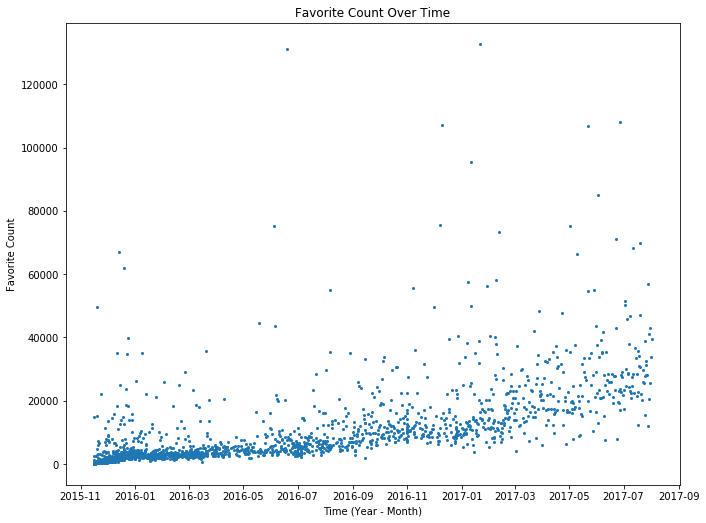

In [55]:
plt.figure(1, figsize = (11, 8.5))
plt.plot(df_clean.timestamp ,df_clean.favorite_count, marker = 'o', linestyle = '', ms = 2)
plt.title('Favorite Count Over Time')
plt.xlabel('Time (Year - Month)')
plt.ylabel('Favorite Count')
plt.show()